## 3.3 다차원 배열의 계산
### 3.3.1 다차원 배열
다차원 배열은 숫자를 N차원으로 나열한 것을 말한다. 1차원 배열의 예를 살펴보자.

In [1]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


배열의 차원 수는 `np.ndim()` 함수로, 배열의 형상은 `shape` 메서드로 확인할 수 있다. 결과를 살펴보면 `A`는 1차원 배열이고 원소 4개로 이루어져 있다. 주의할 점은 `A.shape`가 튜플(tuple)을 반환한다는 것이다. 이는 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위함인데, 예를 들어 2차원 배열일 때는 (4, 3), 3차원 배열일 때는 (4, 3, 2)와 같은 튜플을 반환한다.

In [2]:
print(np.ndim(A))    # 배열의 차원 수 확인
print(A.shape)       # 배열의 형상 확인

1
(4,)


2차원 배열도 확인해보자. 여기서는 $3 \times 2$배열 `B`를 작성했다. $3 \times 2$배열은 처음 차원(0번째)에는 원소가 3개, 다음 차원(1번째)에는 원소가 2개 있다는 의미로, 2차원 배열은 특히 행렬에 대응된다.

In [3]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
print(np.ndim(B))    # 배열의 차원 수 확인
print(B.shape)       # 배열의 형상 확인

2
(3, 2)


### 3.3.2 행렬의 곱
행렬(2차원 배열)의 곱은 다음과 같이 `np.dot()`을 사용해 수행할 수 있다.

In [5]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
print(B.shape)

(2, 2)
(2, 3)


In [6]:
np.dot(A, B)

array([[ 9, 12, 15],
       [19, 26, 33]])

행렬 곱 $A\times B$에서 행렬 $A$의 열의 수와 행렬 $B$의 행의 수가 일치해야 계산이 가능하듯, $A$가 2차원 행렬이고 $B$가 1차원 배열일 때도 대응하는 차원의 원소 수가 일치해야하는 원칙은 동일하다.
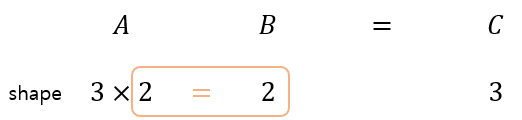

In [7]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])
print(A.shape)
print(B.shape)

(3, 2)
(2,)


In [8]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱
numpy 행렬을 써서 간단하게 신경망을 구현해보자. 우선 다음과 같이 편향과 활성화 함수가 없이 가중치만 갖는 신경망을 가정해보자.  

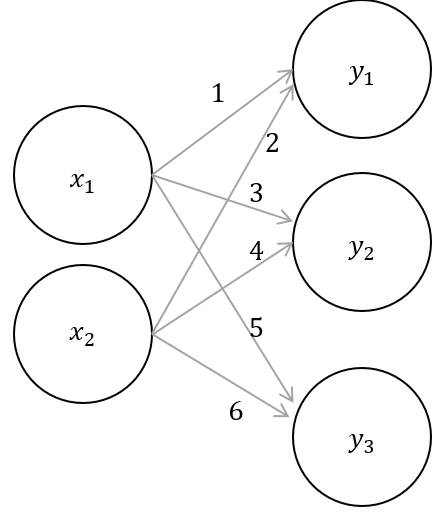  
이 경우 가중치 행렬을 다음과 같이 표현할 수 있다.  
\begin{equation}
W = \begin{pmatrix} 1 & 3 & 5 \\ 2 & 4 & 6\end{pmatrix}
\end{equation}   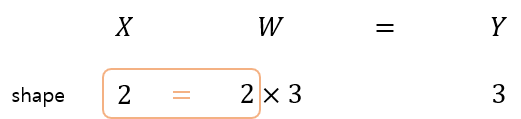

따라서, 이를 구현하면 다음과 같다($x_1=1$, $x_2=2$ 가정).

In [9]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
print(X.shape)
print(W.shape)

(2,)
(2, 3)


In [10]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

------
## 3.4 3층 신경망 구현하기
이번에는 다음 그림의 3층 신경망에서 수행되는 순방향 처리를 구현해보자.  
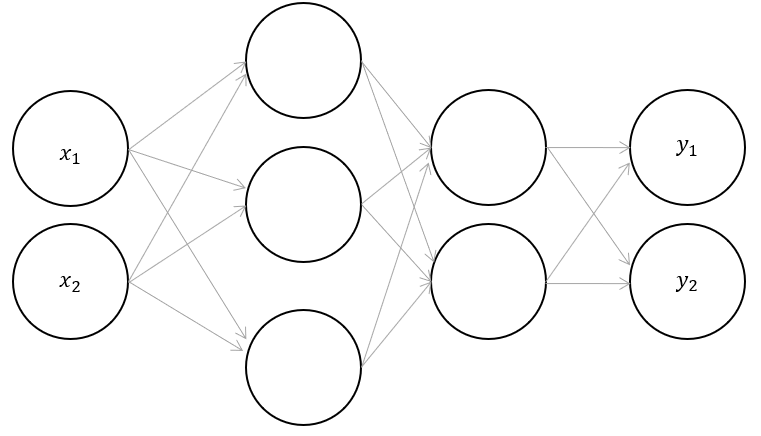

### 3.4.1 표기법
먼저 구현을 위해 간단히 표기법을 정리해보고자 한다.  
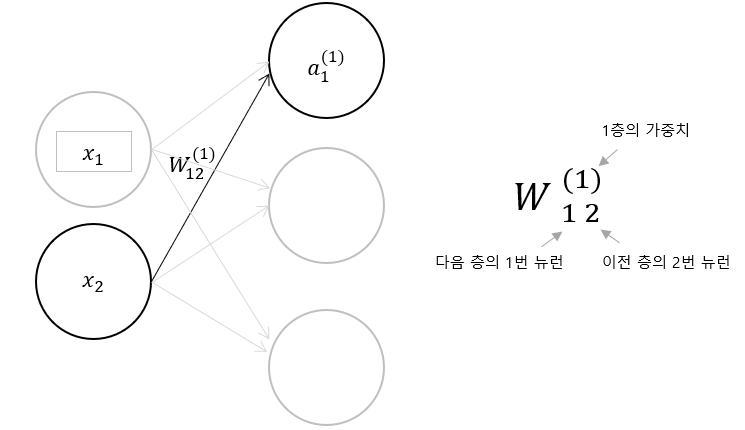  
가중치 $w$와 은닉측 뉴런 $a$의 오른쪽 위에 표시한 $(1)$은 1층을 나타낸다. 즉, $w^{(1)}$과 $a^{(1)}$은 각각 1층의 가중치, 1층의 뉴런을 뜻한다. 또한, 가중치 아래의 숫자는 차례로 다음 층 뉴런과 이전 층 뉴련의 인덱스를 뜻한다. 따라서, **$w_{12}^{(1)}$은 0층의 2번째 뉴런 $x_2$에서 1층의 1번째 뉴런 $a_1^{(1)}$로 향할 때의 가중치**를 의미한다.  


### 3.4.2 각 층의 신호 전달 구현하기
입력층(0층)에서 1층의 첫 번째 뉴런으로 가는 신호를 살펴보자.  
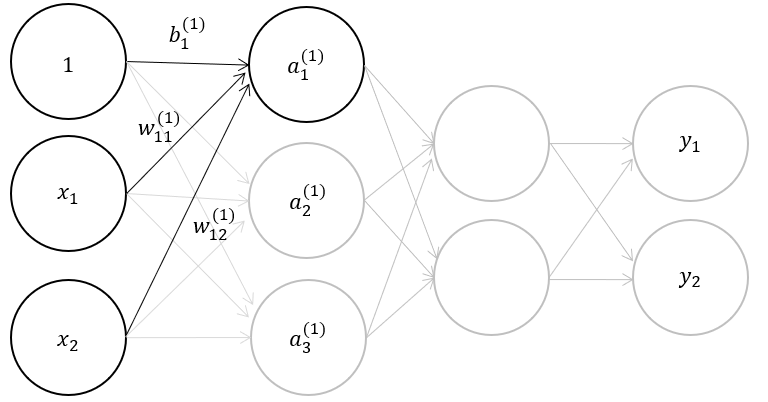  

앞선 그림들과 다른 점은 편향을 나타내는 뉴런이 추가되었다는 점이다. 편향은 오른쪽 아래 인덱스가 하나밖에 없는데, 이는 앞 층의 편향을 나타내는 뉴런이 하나뿐이기 때문이다.  
  
지금까지의 내용을 바탕으로 1층의 한 개 뉴런 $a_1^{(1)}$을 수식으로 나타내면 식(2)와 같다.  
\begin{equation}
a_1^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)}
\end{equation}  
  
이를 확장하여 1층 전체의 가중치 부분을 행렬의 곱을 이용해 표현하면 식(3)과 같다.  
\begin{equation}
A^{(1)} = XW^{(1)} + B^{(1)} \\
where~~ A^{(1)}=(a_1^{(1)}, a_2^{(1)}, a_3^{(1)}),~~ X = (x_1, x_2), ~~ B^{(1)}=(b_1^{(1)}, b_2^{(1)}, b_3^{(1)}) \\
~~W^{(1)} = \begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \end{pmatrix}
\end{equation}   
  
이제 입력, 가중치, 편향은 적당한 값으로 설정한 뒤 넘파이의 다차원 배열을 이용해 식 (3)을 구현해보자.


In [11]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [12]:
A1 = np.dot(X,W1) + B1
A1

array([0.3, 0.7, 1.1])

`X`는 원소가 2개인 1차원 배열, `W1`은 $2 \times 3$ 행렬로 대응하는 차원의 원소 수가 일치하는 것을 확인하자.  
  
이어서 활성화 함수에 처리를 살펴보면 다음 그림과 같다.  
  
  
위 그림과 같이 은닉층에서의 가중합을 $a$로 표기하고, 활성화 함수 $h()$로 변환한 신호를 $z$로 표기하자. 여기서 활성화 함수로 시그모이드 함수를 사용해보자.  
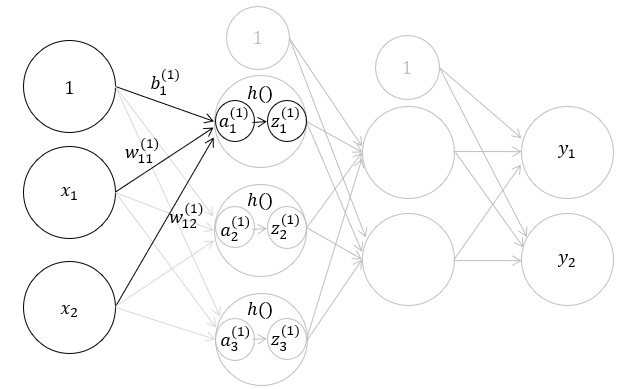

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


이어서 1층에서 2층으로 가는 다음 과정도 그림으로 살펴보고 구현해보자.  
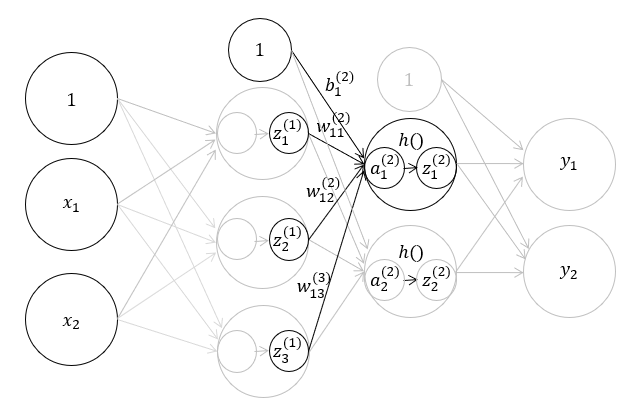  

이 과정을 수식으로 표현하면 다음과 같다.
\begin{equation}
A_2 = W^{(2)}Z_1 + B^{(2)} \\
Z_2 = h(A_2)
\end{equation}

In [14]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)  
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [15]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

이 구현은 1층의 출력 `Z1`이 2층의 입력이 된다는 점만 제외하면 앞선 구현과 동일하다. 단, **활성화 함수만 지금까지의 은닉층과 달리 항등함수를 사용한다.**  
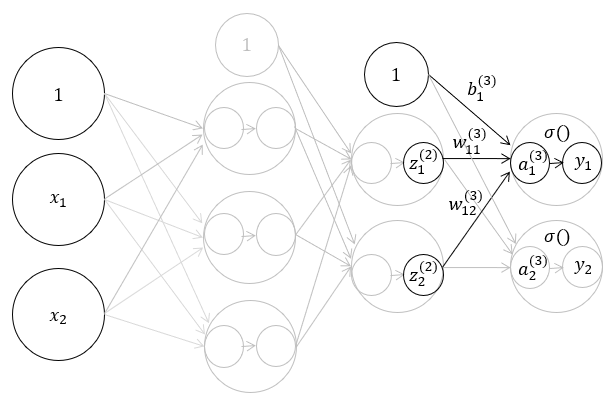

마지막으로 2층에서 출력층으로 신호전달을 구현해보자.

In [16]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

여기에서는 항등 함수를 정의하고, 이를 출력층의 활성화 함수로 사용했다. 실제 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다. 예를 들어, 회귀 문제에서는 항등 함수, 이항 분류 문제에서는 시그모이드 함수, 다중 분류에서는 소프트맥스 함수를 사용하는 것이 일반적이다.  
　
  

### 3.4.3 구현 정리
지금까지의 구현을 정리해보자.

In [17]:
# 가중치와 편향을 반환하는 함수 정의
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 가중치와 편향을 받아 3층 신경망 구현하는 함수 정의
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    A1 = np.dot(x, W1) + b1
    Z1 = sigmoid(A1)
    
    A2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(A2)
    
    A3 = np.dot(Z2, W3) + b3
    
    Y = identity_function(A3)
    
    return Y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


`init_network()`함수는 각 층에서의 가중치와 편향을 딕셔너리 자료형에 저장한다. 그리고 `forward()`는 network와 함께 입력 신호를 받아 출력으로 변환하는 처리 과정을 구현한 함수다. 여기서 함수 이름을 'forward'라고 정한 이유는 신호가 순방향(입력->출력)으로 전달(순전파)되는 것을 알리기 위함이다. 추후에는 역방향(backward) 처리에 대해서도 다룬다.  
  
------

## 3.5 출력층 설계하기
신경망을 분류 문제와 회귀 문제에 모두 사용 가능하다. 하지만 문제에 따라 사용하는 활성화 함수가 다른데, 일반적으로 회귀에는 항등 함수를 사용하고 분류에는 소프트맥스 함수를 사용한다.  
### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
**항등 함수(identity function)**는 입력을 그대로 출력하는 함수다. 따라서 이를 그림으로 나타내면 다음과 같으며, 항등 함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표로 표시한다.  
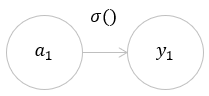  
  
한편, 분류에서 사용하는 **소프트맥스 함수(softmax function)**는 다음과 같다.  
\begin{equation}
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
\end{equation}  
여기서, $n$은 출력층의 뉴런 수, $y_k$는 그중 $k$번째 출력을 뜻한다. 이 소프트맥스 함수를 그림으로 나타내면 아래와 같다. 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다. 식 (5)의 분모를 보면, 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.  
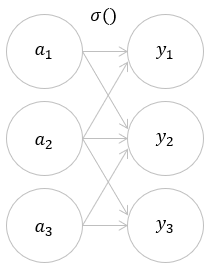

In [18]:
# softmax function example
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [19]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

### 3.5.2 소프트맥스 함수 구현 시 주의점
위에서 구현한 소프트맥스 함수 코드는 컴퓨터로 계산 시 결함이 있다. 한정된 메모리 용량을 넘어가는 값이 들어갈때 발생하는 오류를 오버플로 문제라고 하는데, 지수 함수를 포함한 소프트맥스 함수의 경우 이러한 오버플로 문제가 발생할 수 있다. 따라서 이를 해결하기 위해 식 (6)처럼 수식을 개선해보자.  
\begin{equation}
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} \\
= \frac{Cexp(a_k)}{C\sum_{i=1}^n exp(a_i)} \\
= \frac{exp(a_k+C')}{\sum_{i=1}^n exp(a_i+C')}
\end{equation}  
  
분모와 분자의 동일한 임의의 정수 $C$를 곱한 식을 변형한 것으로, 결국 소프트맥스의 지수 함수 부분을 계산 시 어떤 정수를 더하거나 빼도 결과는 동일하다는 것이다. 따라서, 오버플로 문제를 방지하기 위해 입력 신호 중 최댓값을 $C'$으로 사용하자.

In [20]:
# 오버플로 문제 예시
a = np.array([1010, 1000, 990])
print(softmax(a))

[nan nan nan]


C:\Users\sean\anaconda3\envs\DLbottom\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\sean\anaconda3\envs\DLbottom\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [21]:
# 오버플로 문제 해결 예시
a = np.array([1010, 1000, 990])
c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

따라서, 아래와 같이 소프트맥스 함수를 다시 구현해보자.

In [22]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

### 3.5.3 소프트맥스 함수의 특징

In [23]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


소프트맥스의 출력은 0에서 1.0 사이의 실수이며, **총합이 1이 된다.** 특히 이런 특징으로 인해 소프트맥스 함수의 출력은 '확률'로 해석할 수 있다.  
  
예를 들어, 위의 출력에서 `y[0]`의 확률은 0.018, `y[1]`의 확률은 0.245, `y[2]`의 확률은 0.737로 해석할 수 있으며 이로부터 "정답은 2번째 클래스다"라고 할 수 있다. 또는 "약 74%의 확률로 2번째 클래스, 약 25%의 확률로 1번째 클래스, 1.8%의 확률로 0번째 클래스"와 같이 확률적인 결론도 가능하다.  
  
여기서 주의할 점은 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다는 점이다. 즉, 지수 함수는 단조 증가 함수(monotone increasing function)이기 때문에 소프트맥스 함수를 적용하기 전 `a`의 원소들의 대소관계는 소프트맥스 함수를 적용 후 `y`의 원소들의 대소 관계와 동일하다. 따라서, 일반적으로 신경망으로 분류할 때(추론 단계)는 출력층의 소프트맥스 함수를 생략해도 무방하다(단, 학습 단계에서는 출력층에서 소프트맥스 함수 사용).  
  
또한, 출력층의 뉴런 수는 문제에 맞게 적절히 정해야 하는데, 분류에서는 분류하고자 하는 클래스 수만큼 설정하는 것이 일반적이다. 

---------------------------------------------------------

## 3.6 손글씨 숫자 인식
신경망을 실제 데이터에 적용해보자. 이번 절에서는 이미 학습된 가중치와 편향을 사용하여 학습 과정을 생략하고 추론과정만 구현해보도록 하자. 이 추론 과정을 신경망의 **순전파(forward propagation)**라고도 한다.  
  
### 3.6.1 MNIST 데이터셋
사용할 데이터셋은 MNIST라는 손글씨 숫자 이미지셋이다. MNIST 데이터셋은 0부터 9까지의(총 10개의 클래스) 숫자 이미지로 구성되는데, 훈련 이미지 60,000장, 시험 이미지 10,000장이 존재한다.  
이미지는 28x28 크기의 흑백 이미지(1채널)이며, 각 픽셀은 0\~255까지의 값을 취한다. 이때 0은 검정, 255는 흰색에 대응된다. 각 이미지에는 실제 의미하는 숫자가 레이블되어 있다. 아래는 MNIST 데이터를 불러오는 코드인데, 여기서 `flatten=True`를 설정함으로써 입력 이미지를 1x28x28의 3차원 배열이 아닌, 784개의 원소로 이루어진 1차원 배열로 불러왔다. 또한, `normalize=False`를 설정해 0\~1 사이의 값으로 정규화하지 않고 원래 값 그대로 0\~255 사이의 픽셀 값을 갖도록 했다.

In [24]:
import sys, os
sys.path.append(os.pardir)
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [25]:
print(x_train.shape)   # (60000, 784)
print(t_train.shape)   # (60000,)
print(x_test.shape)    # (10000, 784)
print(t_test.shape)    # (10000)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


데이터를 불러와 확인해보자. 여기서 1차원 배열로 이미지를 불러왔기 때문에 다시 28x28의 shape로 변환해주어야 한다.

5
(784,)
(28, 28)


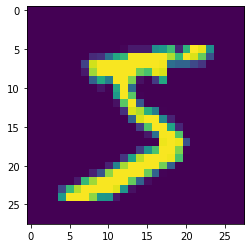

In [26]:
import matplotlib.pyplot as plt
 
img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

plt.imshow(img)
plt.show()

### 3.6.2 신경망의 추론 처리
이제 MNIST 데이터셋을 이용해 추론을 수행하는 신경망을 구현해보자. 이때 **입력층 뉴런**은 이미지 크기(28x28)에 맞게 784개, **출력층 뉴런**은 0부터 9까지 범주에 맞게 10개인 신경망을 구성하기로 하자. 또한, 50개 뉴런을 배치한 은닉층 1개, 100개의 뉴런을 배치한 은닉층 1개 **총 2개의 은닉층**을 사용하자.  
아래의 함수는 순서대로 작업을 처리하는 함수들인데, `init_network()`에서는 이미 학습된 가중치 매개변수를 가져오는데, 해당 파일에는 가중치와 편향이 딕셔너리 형태로 저장되어 있다.

In [27]:
import pickle

def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, y_test

def init_network():
    with open('./sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
        
    return y

위 함수를 이용해 신경망에 의한 추론을 진행하고, 정확도(accuracy)로 평가해보자. `x, t = get_data()`에서 MNIST의 시험 셋 데이터를 얻고 `network = init_network()`로 학습된 네트워크를 불러와 생성한다. 그 뒤 반복문을 수행하며 이미지를 하나씩 불러와 `y_prob = predict(network, x[i])`로 각 이미지마다 출력층에서의 확률을 저장한다. 이때 저장한 `y_prob`은 원소 10개짜리 넘파이 배열인데 각 원소마다 해당 숫자의 확률로 해석한다.  

In [28]:
x, t = get_data()
network = init_network()

accuracy_count = 0

for i in range(len(x)):
    y_prob = predict(network, x[i])
    y = np.argmax(y_prob)    # 확률이 가장 높은 원소의 인덱스 추출
    if y == t[i]:
        accuracy_count += 1
        
print('정확도(accuracy):', accuracy_count/len(x))

정확도(accuracy): 0.9352


출력 결과, 정확도는 0.9352 즉, 올바르게 이미지를 분류할 확률은 약 93.52%다. 또한, 이미지를 불러올 때 `normalize=True`를 사용했는데, 이는 앞서 말했듯이 0\~255 범위인 각 픽셀 값을 0\~1로 변환하는 정규화(normalization)를 뜻한다.

### 3.6.3 배치 처리(batch processing)
앞서 구현한 네트워크에서 입력 데이터와 가중치 매개변수의 shape를 주의깊게 다시 살펴보자.

In [29]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784, 50)
(50, 100)
(100, 10)


각 배열의 대응하는 차원끼리의 원소 수가 아래와 같이 일치한다.  
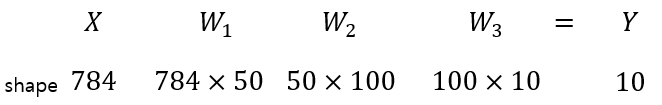  
즉, 전체적으로 보면 원소 784개로 구성된 1차원 배열이 입력되고 마지막에는 원소가 10개짜리 1차원 배열이 출력된다(이미지 데이터 1개만 입력했을 때). 그렇다면 이미지 100장을 한 번에 넣는다면 어떻게 될까? 이는 간단히 입력을 100장 분량의 데이터를 한 번에 입력하면 될 것이다.  
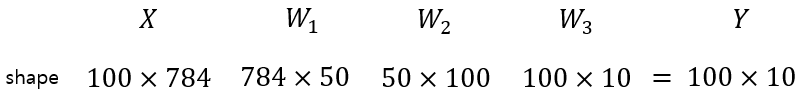  
  
즉, 위와 같이 shape가 100x784인 데이터를 입력하고, 100x10인 데이터가 출력된다. 이는 100장 분량의 입력 데이터의 결과가 한 번에 출력되는 것이다. 이때 `x[0]`와 `y[0]`에는 0번째 이미지의 추론 결과가 들어있을 것이다. 이처럼 하나로 묶은 입력 데이터를 **배치(batch)**라고 한다. 배치처리는 이미지 1장당 처리 시간을 대폭 줄여준다는 계산 시 큰 이점이 있다.  
  
그럼 배치 처리를 구현해보자.

In [30]:
x, t = get_data()
network = init_network()

batch_size = 100  # 배치의 크기
accuracy_count = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_probs = predict(network, x_batch)
    y = np.argmax(y_probs, axis=1)
    accuracy_count += np.sum(y == t[i:i+batch_size])
    
print('정확도(accuracy):', accuracy_count/len(x))

정확도(accuracy): 0.9352


## 3.7 정리
3장에서는 신경망의 순전파에 대해 살펴봤다. 퍼셉트론과 작동 방식이 유사했지만, 이전 층에서 다음 층으로 출력을 전달할 때 사용하는 활성화 함수가 크게 달랐다. 퍼셉트론은 계단 함수였지만, 신경망은 시그모이드, 소프트맥스, ReLU 등을 사용했다. 요약하자면 다음과 같다.
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수와 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 출력층의 활성화 함수로 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층 뉴런의 수를 분류하고자 하는 클래스의 수와 일치시킨다.
- 입력 데이터를 묶은 것을 배치라고 하며, 추론 처리를 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.